In [91]:
import pandas as pd
import numpy as np 
import seaborn as sns
import spacy
import glob
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import io
nlp = spacy.load("de_core_news_sm")

# to_inspect = [filename.split('/')[1].split('_')[0] for filename in glob.glob("25022021_0010/*.json")]



In [92]:
def inspect(directory_glob='25022021_0010/*.json'):
    to_inspect = {}
    for i, file in enumerate(glob.glob(directory_glob)):
        shortened_filename = file.split('/')[1].split('_')[0]
        to_inspect[i] = [shortened_filename, file]
    return to_inspect

def prepare_dataframe(dataframe, filepath):
    global current_df
    
    current_df = pd.read_json(filepath)
    # dataframe
    current_df['doc'] = [nlp(message_text) for message_text in current_df.message_text]
    current_df['entities'] = [doc.ents for doc in current_df.doc]
    current_df['lemmatized'] = [[[token.lemma_.lower() for token in entity if not token.is_punct and not token.is_stop] for entity in row] for row in current_df.entities]

def tokens_sum(current_df):
    current_df['tokens_sum'] = [len(tokens) for tokens in dataframe.doc]
    g = sns.distplot(naomiseibt.tokens_sum)

# https://stackoverflow.com/questions/9372463/extracting-strings-from-nested-lists-in-python
def flatten(input_list):
    output_list = []
    for element in input_list:
        if type(element) == list:
            output_list.extend(flatten(element))
        else:
            output_list.append(element)
    return output_list

def convert_list_to_string(org_list, seperator=' '):
    return seperator.join(org_list)

def generate_wordcloud(current_df, fontpath='/home/pauld/.local/src/ttf-symbola/Symbola.ttf'):

    from collections import Counter
     
    to_cloud = [row for row in current_df.lemmatized]
    to_cloud_flattened = flatten(to_cloud)

    for item in to_cloud_flattened:
        item.encode()

    # Convert list of strings to string
    to_cloud_corpus = convert_list_to_string(to_cloud_flattened)

    # Encode strings as utf-8
    to_cloud_dict = Counter(to_cloud_flattened)

    # https://github.com/gearit/ttf-symbola.git
    font_path = fontpath
    wordcloud = WordCloud(font_path=font_path, width=1600, height=800).generate_from_frequencies(to_cloud_dict)
    
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


In [93]:
for i in inspect():
    print(f"{i}: {to_inspect[i]}")


0: ['Corona', '25022021_0010/Corona_ist_nicht_das_Problem_24022021_223221.json']
1: ['militaernews', '25022021_0010/militaernews_24022021_223551.json']
2: ['verbindediepunkte', '25022021_0010/verbindediepunkte_24022021_223622.json']
3: ['naomiseibt', '25022021_0010/naomiseibt_24022021_222209.json']
4: ['FreiheitsChatDE', '25022021_0010/FreiheitsChatDE_24022021_224119.json']
5: ['Dr', '25022021_0010/Dr_Heinrich_Fiechtner_24022021_223230.json']
6: ['FreieMedienTV', '25022021_0010/FreieMedienTV_24022021_223428.json']
7: ['StuttgartGrundgesetzdemos', '25022021_0010/StuttgartGrundgesetzdemos_24022021_223034.json']
8: ['KoronaAlarm', '25022021_0010/KoronaAlarm_24022021_223725.json']
9: ['MICHAELWENDLEROFFICIAL', '25022021_0010/MICHAELWENDLEROFFICIAL_24022021_223739.json']
10: ['ATTILAHILDMANN', '25022021_0010/ATTILAHILDMANN_2_24022021_223416.json']
11: ['Haintz', '25022021_0010/Haintz_24022021_223255.json']
12: ['ATTILAHILDMANN', '25022021_0010/ATTILAHILDMANN_24022021_222224.json']
13: ['Xav

Dr: 25022021_0010/Dr_Heinrich_Fiechtner_24022021_223230.json


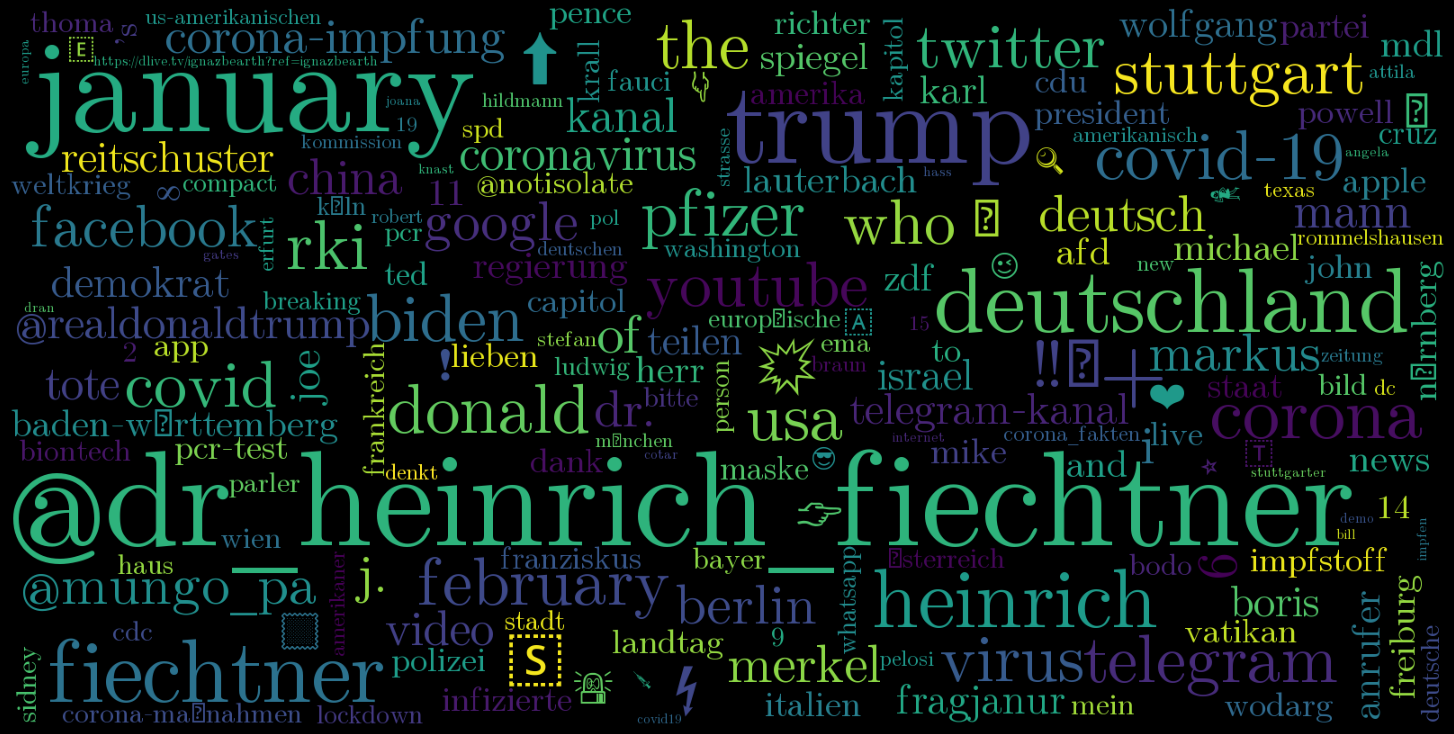

In [94]:

selector = 9

dataframe = to_inspect[selector][0]
filepath = to_inspect[selector][1]
print(f"{dataframe}: {filepath}")
prepare_dataframe(dataframe, filepath)
generate_wordcloud(current_df)


